### Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
!pip install ucimlrepo

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")

print("Path to dataset files:", path)


100%|██████████| 23.2k/23.2k [00:00<00:00, 24.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1


In [18]:
dataset = pd.read_csv('/root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [19]:
dataset = dataset.rename(columns={'Annual Income ($)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore', 'Work Experience': 'WorkExperience', 'Family Size': 'FamilySize'})

In [20]:
dataset.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Profession'] = label_encoder.fit_transform(dataset['Profession'])

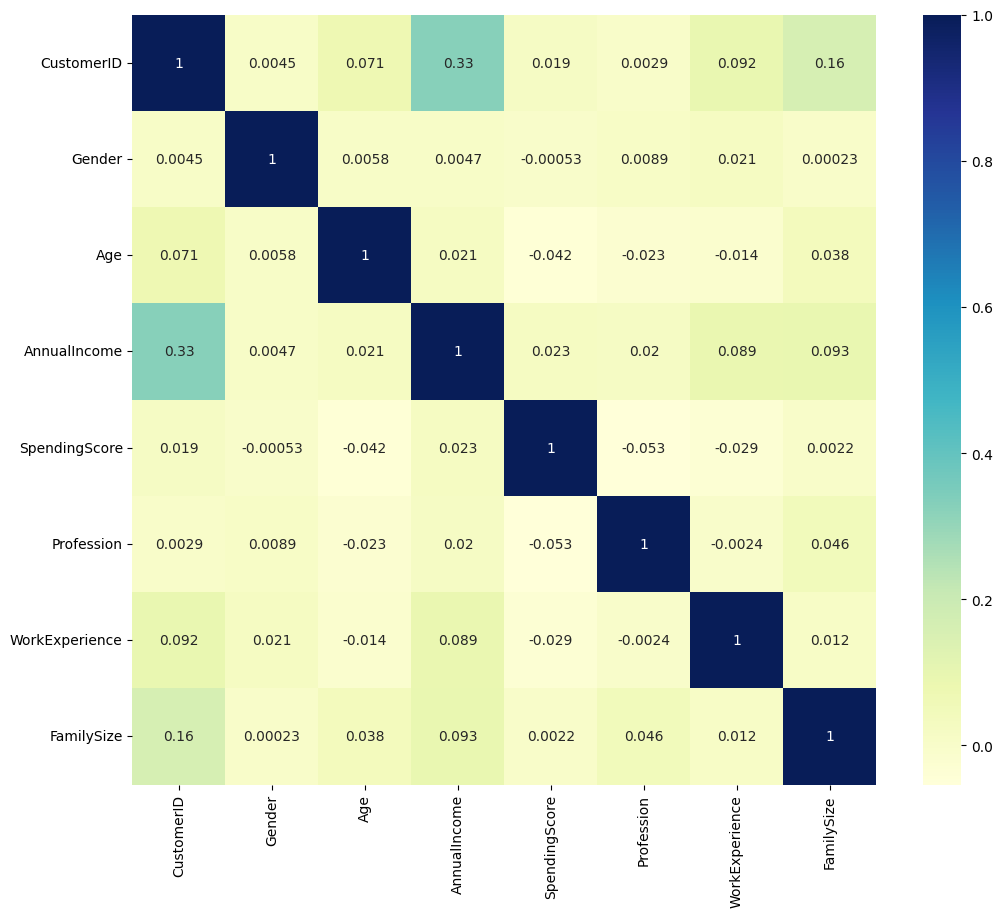

In [22]:
# Import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

plt.figure(figsize=(12, 10))

dataplot = sb.heatmap(dataset.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()

In [23]:
df= dataset.drop(columns=["CustomerID"]).copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [24]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore,Profession,WorkExperience,FamilySize
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


In [25]:
X = df

### Распространенные алгоритмы кластеризации



#### K-Means


In [16]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

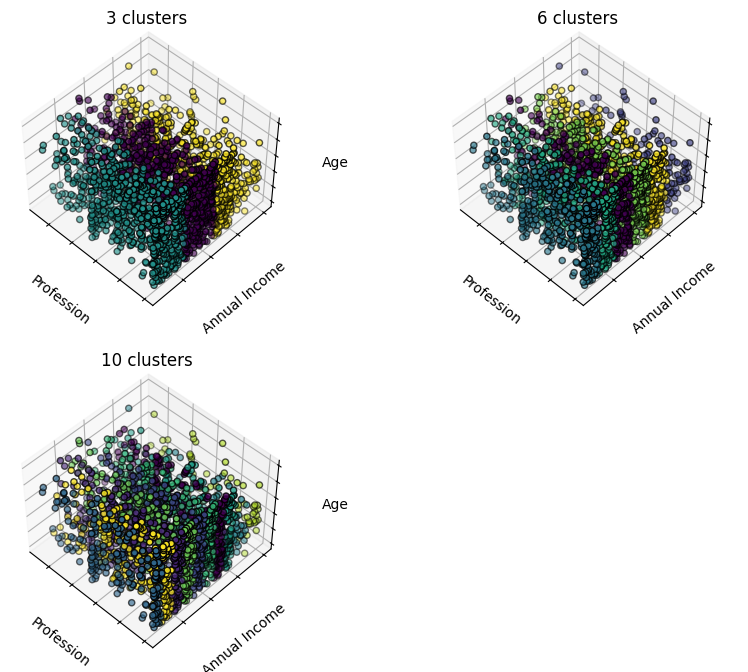

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

estimators = [
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_6", KMeans(n_clusters=6)),
    ("k_means_10", KMeans(n_clusters=10)),
]

fig = plt.figure(figsize=(10, 8))
titles = ["3 clusters", "6 clusters", "10 clusters"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Profession"], X["AnnualIncome"], X["Age"], c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Profession")
    ax.set_ylabel("Annual Income")
    ax.set_zlabel("Age")
    ax.set_title(title)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

#### Метрики



In [27]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Начальные параметры для лучшей метрики
best_metric = [0, -1, []]  # n_clusters, silhouette_score, cluster_centers

silhouette_score_values = []

# Перебор по различным количествам кластеров
for n in n_clusters:
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    # Вычисление метрики silhouette_score
    score = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score)

    # Обновление лучшей метрики, если score больше
    if score > best_metric[1]:
        best_metric[0] = n
        best_metric[1] = score
        best_metric[2] = clusterer.cluster_centers_

# Вывод наилучших параметров
print("Лучшее количество кластеров:", best_metric[0])
print("Лучший silhouette_score:", best_metric[1])
print("Координаты центров кластеров:\n", best_metric[2])


Лучшее количество кластеров: 2
Лучший silhouette_score: 0.6181459259662336
Координаты центров кластеров:
 [[4.00000000e-01 4.92777778e+01 1.50041482e+05 5.21202020e+01
  3.02323232e+00 4.42424242e+00 3.96161616e+00]
 [4.13861386e-01 4.86485149e+01 7.22005703e+04 4.98277228e+01
  2.85544554e+00 3.78712871e+00 3.57920792e+00]]


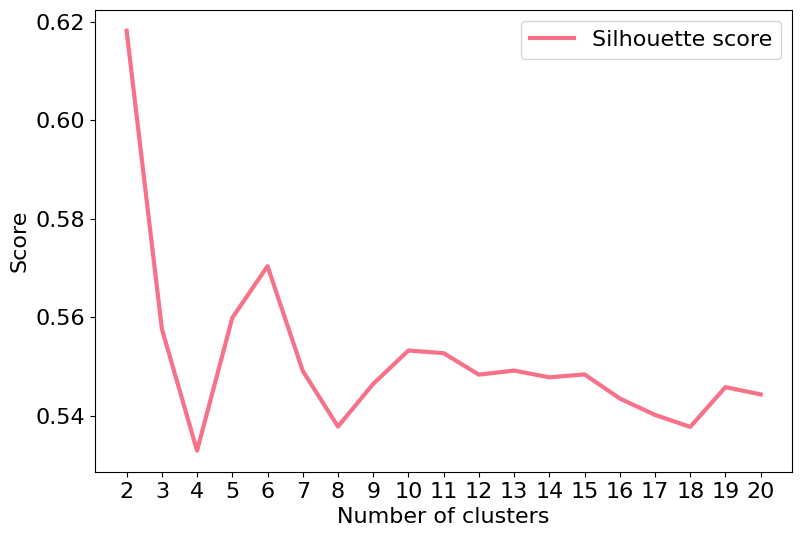

In [29]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


#plt.figure(figsize=(9, 6))
#plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
#plt.xlabel('Number of clusters', size=16)
#plt.ylabel('Score', size=16)
#plt.xticks(n_clusters, size=16)
#plt.yticks(size=16)
#plt.legend(loc='best', fontsize=16)

#plt.show()

#### Иерархическая кластеризация


In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

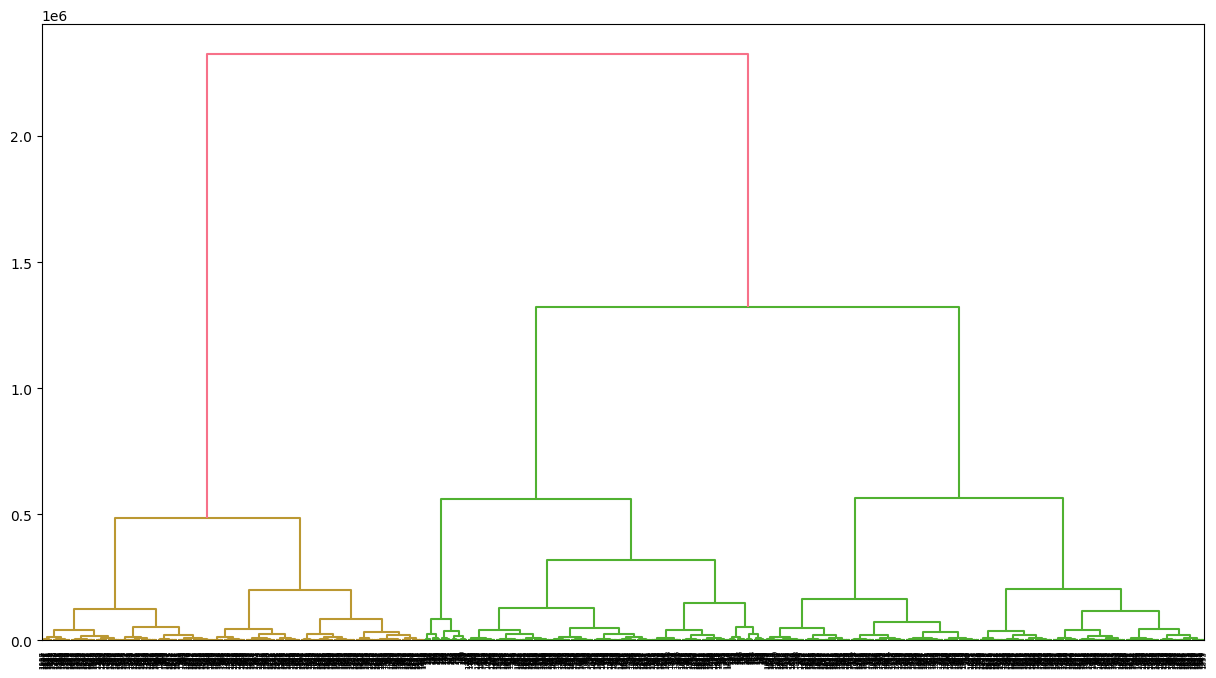

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Преобразование данных в массив
samples = df.values

# Выполнение иерархической кластеризации с методом Уорда
mergings = linkage(samples, method='ward')

# Построение дендрограммы
plt.figure(figsize=(15, 8))
dendrogram(mergings,
           leaf_rotation=90,  # Поворот подписей листьев для удобства
           leaf_font_size=5   # Размер шрифта для подписей
           )

plt.show()

#### DBSCAN
***Пространственная кластеризация приложений с шумом на основе плотности***


In [33]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [34]:
mins = X.shape[1]

['y', 'b']


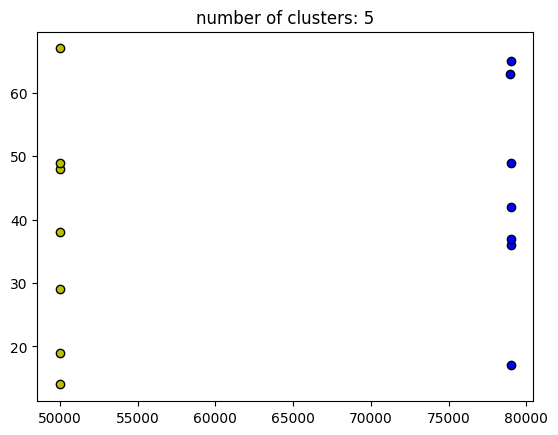

In [52]:
db = DBSCAN(eps = 60, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
#colors = ['y', 'b', 'g', 'r', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
colors = ['y', 'b']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["AnnualIncome"], xy["Age"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["AnnualIncome"], xy["Age"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


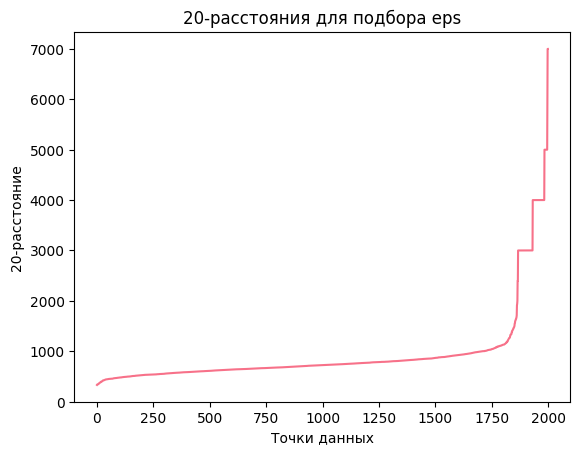

In [59]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Указываем число соседей
neighbors = 20  # значение должно совпадать с min_samples
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X)
distances, indices = nbrs.kneighbors(X)

# Сортируем и строим график расстояний до ближайших соседей
distances = np.sort(distances[:, neighbors - 1], axis=0)
plt.plot(distances)
plt.xlabel("Точки данных")
plt.ylabel(f"{neighbors}-расстояние")
plt.title(f"{neighbors}-расстояния для подбора eps")
plt.show()

['y', 'b', 'g', 'r', 'c']


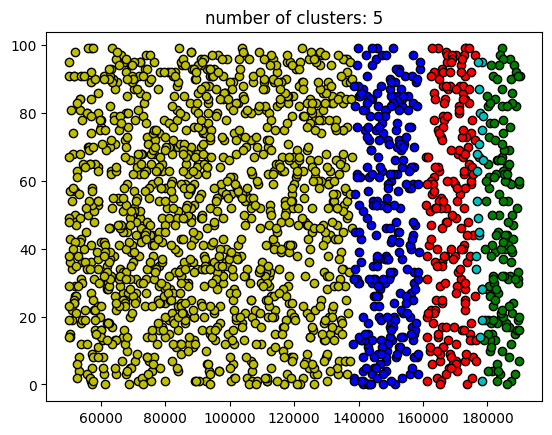

In [69]:
db = DBSCAN(eps = 1000, min_samples = 20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
#colors = ['y', 'b', 'g', 'r', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
colors = ['y', 'b', 'g', 'r', 'c']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["AnnualIncome"], xy["Age"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["AnnualIncome"], xy["Age"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

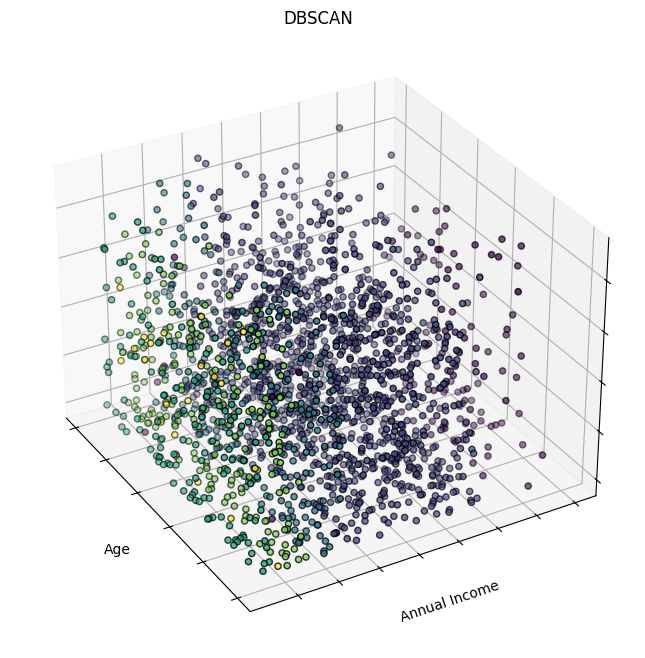

In [66]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=31, azim=150)

ax.scatter(X["Age"], X["AnnualIncome"], X["Profession"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Profession")
ax.set_title("DBSCAN")

plt.show()

In [67]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.33
